In [ ]:
'''
Code Outline:
1. CNN implementation
2. Writeup explaing structure
3. Neural Network implementation
4. Comparison of results
'''

'\nCode Outline:\n1. CNN implementation\n2. Writeup explaing structure\n3. Neural Network implementation\n4. Comparison of results\n'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

In [ ]:
(X, Y), (X_test, Y_test) = mnist.load_data()

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=314159, test_size=0.2, shuffle=True, stratify=Y)

# Reshape the data for NN
nn_X_train = X_train.reshape((X_train.shape[0], 784)).astype('float32')
nn_X_test = X_test.reshape((X_test.shape[0], 784)).astype('float32')
nn_X_val = X_val.reshape((X_val.shape[0], 784)).astype('float32')

# Reshape the data to have a single channel (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# can remove the one_hot_encoding and use sparse_categorical_cross_entropy (as Raschka does), performace similar

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_val = to_categorical(Y_val)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define the CNN model - Used values found in Raschka
model = Sequential()

'''
Will discuss architecture in more detail in the write up at the end.
'''
model.add( Conv2D(filters=16, kernel_size=(5, 5), strides=(1,1), padding='same', data_format='channels_last', name='conv1', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), padding='same', data_format='channels_last', name='conv2', activation='relu'))
model.add( MaxPooling2D(pool_size=(2, 2), name='pool2'))

print(model.compute_output_shape(input_shape=(16,28,28,1)))

model.add(keras.layers.Flatten())
print(model.compute_output_shape(input_shape=(16,28,28,1)))

model.add(Dense(units=1024, name='fc1', activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, name='fc2', activation='softmax'))

print(model.compute_output_shape(input_shape=(16,28,28,1)))

tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

(16, 7, 7, 32)
(16, 1568)
(16, 10)


In [ ]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
'''
Including early stopping so I can set a high epoch number and rely on stopping to prevent overfitting.
'''

# Train the model with the adjusted batch size
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_val, Y_val), shuffle=True, callbacks=[early_stopping])

Epoch 1/20
1500/1500 [==============================] - 12s 5ms/step - loss: 0.4044 - accuracy: 0.9315 - val_loss: 0.1002 - val_accuracy: 0.9707
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0930 - accuracy: 0.9721 - val_loss: 0.0943 - val_accuracy: 0.9734
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0849 - accuracy: 0.9751 - val_loss: 0.0658 - val_accuracy: 0.9803
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0775 - accuracy: 0.9780 - val_loss: 0.0737 - val_accuracy: 0.9824
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0737 - accuracy: 0.9795 - val_loss: 0.0743 - val_accuracy: 0.9805
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0736 - accuracy: 0.9804 - val_loss: 0.0740 - val_accuracy: 0.9835


In [ ]:
cnn_predictions = model.predict(X_test)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)
cnn_true_labels = np.argmax(Y_test, axis=1)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Classification Report
print("Classification Report:")
print(classification_report(cnn_true_labels, cnn_predicted_labels))

# Accuracy
cnn_accuracy = accuracy_score(cnn_true_labels, cnn_predicted_labels)
print("Accuracy:", cnn_accuracy)

# Precision
cnn_precision = precision_score(cnn_true_labels, cnn_predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("Precision:", cnn_precision)

# Recall
cnn_recall = recall_score(cnn_true_labels, cnn_predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("Recall:", cnn_recall)

# F1 Score
cnn_f1 = f1_score(cnn_true_labels, cnn_predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("F1 Score:", cnn_f1)

# Confusion Matrix
conf_matrix = confusion_matrix(cnn_true_labels, cnn_predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.95      0.99      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 0.9785
Precision: 0.9786212372612058
Recall: 0.9785
F1 Score: 0.9784926218929628
Confusion Matrix:
[[ 971    0    1    1    0    1    4    1    1    0]
 

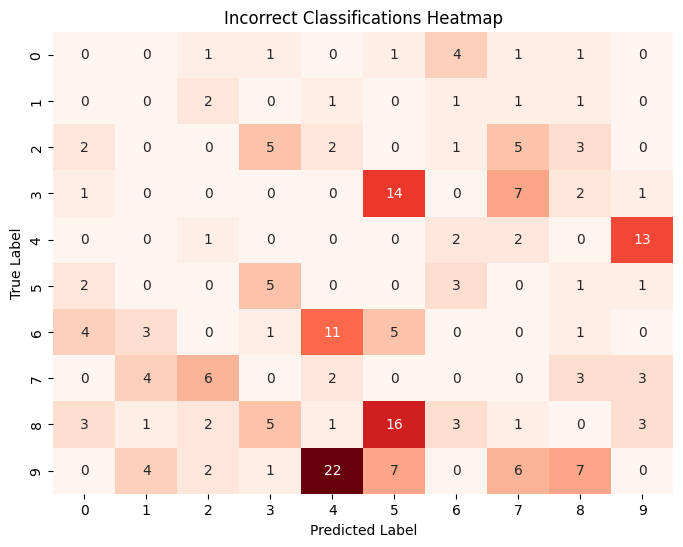

'\nThe Below plot is a heatmap of INCORRECT classifications in the test set.\nAs expected, one of the most common errors is confusing 4 for 9.\n'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a confusion matrix for incorrect classifications
num_classes = 10
incorrect_confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Populate the incorrect confusion matrix
for i in range(len(cnn_predictions)):
    true_label = cnn_true_labels[i]
    predicted_label = cnn_predicted_labels[i]
    if true_label != predicted_label:  # Check if prediction is incorrect
        incorrect_confusion_matrix[true_label, predicted_label] += 1

# Plot heatmap for incorrect classifications
plt.figure(figsize=(8, 6))
sns.heatmap(incorrect_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Incorrect Classifications Heatmap')
plt.show()

'''
The Below plot is a heatmap of INCORRECT classifications in the test set.
As expected, one of the most common errors is confusing 4 for 9.
'''

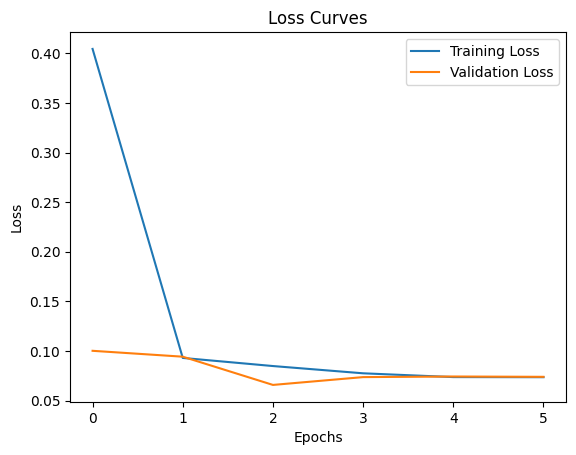

'\nA surpirising note about this plot is that the validation loss is lower than the training loss for some of the training.\nUpon researching the issue, dropout is only applicable during the training process and affects training loss, \nleading to cases where validation loss is lower than training loss.\n'

In [ ]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

'''
A surpirising note about this plot is that the validation loss is lower than the training loss for some of the training.
Upon researching the issue, dropout is only applicable during the training process and affects training loss,
leading to cases where validation loss is lower than training loss.
'''

In [ ]:
'''
Discussion Regarding Architechture and Hyperparams

The main structure was inspired by Raschka's structure in Chapter 15.
This strcuture follows similar structures we've discussed (such as ImageNet) where we have 1+ convolutional layers
followed by 1+ dense layers.

One change I made from Raschka was reducing the number of kernels from 32 and 62, in conv1 and conv2 respectively, to 16 and 32 kernels.
This change cut down time per epoch from 3:20 to about 1:30 and I saw no significant change in loss or accuracy.

I took Professor Feltenberger's suggestion to add a droput layer to reduce overfitting.

All other hyperparamters are unchanged from Raschka's code.
'''

"\nDiscussion Regarding Architechture and Hyperparams\n\nThe main structure was inspired by Raschka's structure in Chapter 15.\nThis strcuture follows similar structures we've discussed (such as ImageNet) where we have 1+ convolutional layers\nfollowed by 1+ dense layers.\n\nOne change I made from Raschka was reducing the number of kernels from 32 and 62, in conv1 and conv2 respectively, to 16 and 32 kernels.\nThis change cut down time per epoch from 3:20 to about 1:30 and I saw no significant change in loss or accuracy.\n\nI took Professor Feltenberger's suggestion to add a droput layer to reduce overfitting.\n\nAll other hyperparamters are unchanged from Raschka's code.\n"

In [ ]:
from keras import regularizers

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(128, input_shape=(784,), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
nn_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Additional hidden layer with L2 regularization
nn_model.add(Dense(10, activation='softmax'))

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model using the validation, keeping test data independent, using early stopping
nn_history = nn_model.fit(nn_X_train, Y_train, epochs=100, batch_size=32, validation_data=(nn_X_val, Y_val), callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 2.1990 - accuracy: 0.8616 - val_loss: 0.6926 - val_accuracy: 0.9117
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.9223 - val_loss: 0.5235 - val_accuracy: 0.9246
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4238 - accuracy: 0.9408 - val_loss: 0.3870 - val_accuracy: 0.9463
Epoch 4/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3472 - accuracy: 0.9488 - val_loss: 0.3632 - val_accuracy: 0.9492
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.9553 - val_loss: 0.3052 - val_accuracy: 0.9520
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2505 - accuracy: 0.9595 - val_loss: 0.2683 - val_accuracy: 0.9515
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2308 - accuracy: 0.9614 - val_loss: 0.2743 - val_ac

In [ ]:
nn_predictions = nn_model.predict(nn_X_test)
nn_predicted_labels = np.argmax(nn_predictions, axis=1)
nn_true_labels = np.argmax(Y_test, axis=1)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Classification Report
print("Classification Report:")
print(classification_report(nn_true_labels, nn_predicted_labels))

# Accuracy
nn_accuracy = accuracy_score(nn_true_labels, nn_predicted_labels)
print("Accuracy:", nn_accuracy)

# Precision
nn_precision = precision_score(nn_true_labels, nn_predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("Precision:", nn_precision)

# Recall
nn_recall = recall_score(nn_true_labels, nn_predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("Recall:", nn_recall)

# F1 Score
nn_f1 = f1_score(nn_true_labels, nn_predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("F1 Score:", nn_f1)

313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.98      0.92      0.95      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.95      0.98      0.97      1028
           8       0.95      0.96      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy: 0.9656
Precision: 0.9657484346740727
Recall: 0.9656
F1 Score: 0.9655608861273498


375/375 [==============================] - 1s 1ms/step


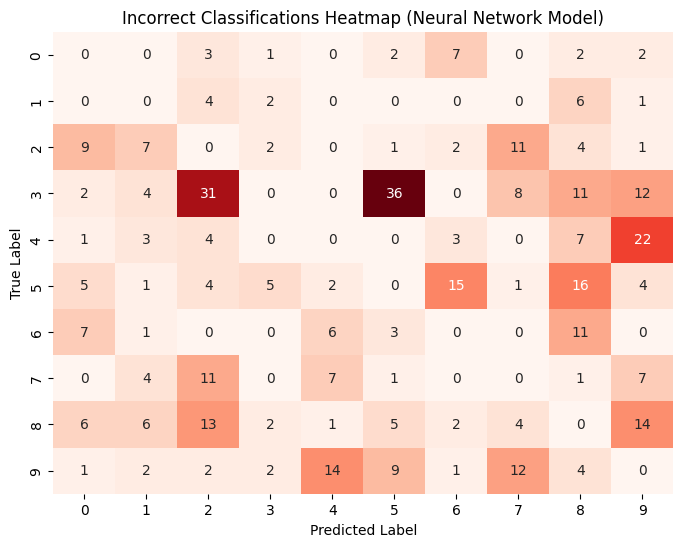

In [ ]:
# Make predictions for the neural network model
nn_predictions = np.argmax(nn_model.predict(nn_X_val), axis=1)

# Initialize a confusion matrix for incorrect classifications
num_classes = 10
incorrect_confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Populate the incorrect confusion matrix
for i in range(len(nn_predictions)):
    true_label = np.argmax(Y_val[i])
    predicted_label = nn_predictions[i]
    if true_label != predicted_label:  # Check if prediction is incorrect
        incorrect_confusion_matrix[true_label, predicted_label] += 1

# Plot heatmap for incorrect classifications
plt.figure(figsize=(8, 6))
sns.heatmap(incorrect_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Incorrect Classifications Heatmap (Neural Network Model)')
plt.show()

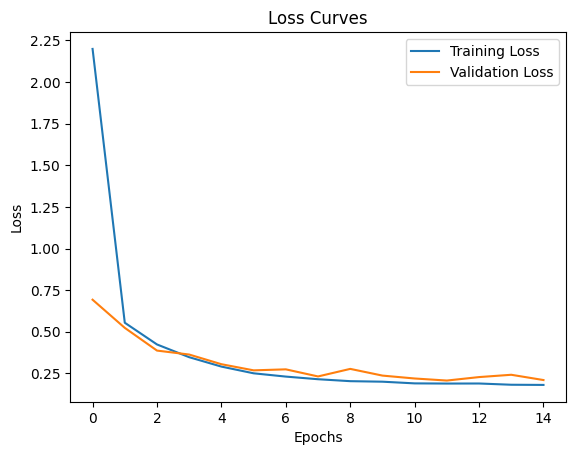

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


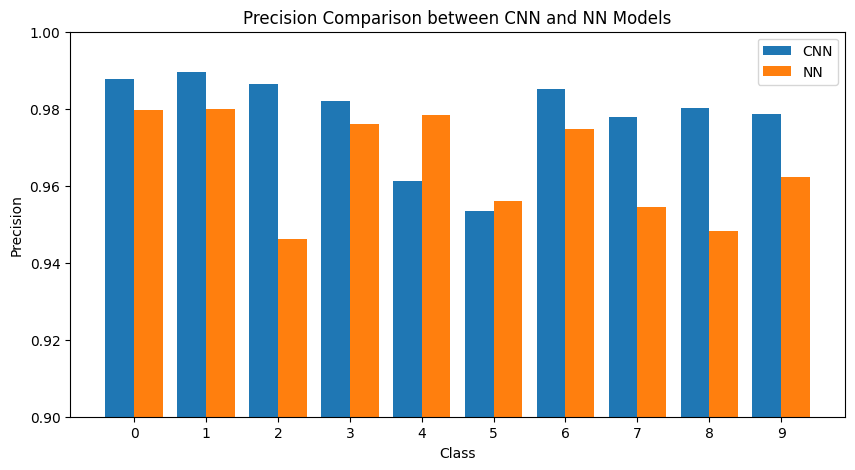

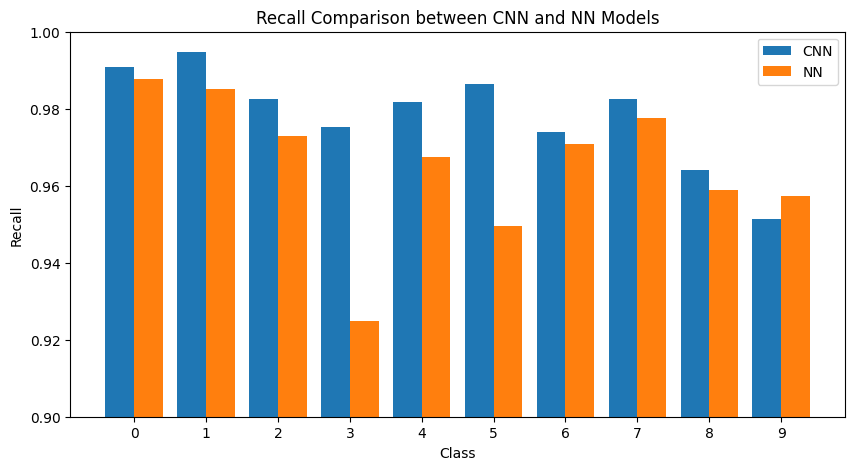

In [ ]:
# compare precision and recall of the two models
from sklearn.metrics import precision_score, recall_score

# # # Calculate precision for CNN and NN models
cnn_precision = precision_score(cnn_true_labels, cnn_predicted_labels, average=None)
nn_precision = precision_score(nn_true_labels, nn_predicted_labels, average=None)

# # Calculate recall for CNN and NN models
cnn_recall = recall_score(cnn_true_labels, cnn_predicted_labels, average=None)
nn_recall = recall_score(nn_true_labels, nn_predicted_labels, average=None)

# Plot precision for both models
plt.figure(figsize=(10, 5))
plt.bar(np.arange(10) - 0.2, cnn_precision, width=0.4, label='CNN')
plt.bar(np.arange(10) + 0.2, nn_precision, width=0.4, label='NN')
plt.xticks(np.arange(10), np.arange(10))
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision Comparison between CNN and NN Models')
plt.legend()
plt.ylim(0.9, 1)
plt.show()

# Plot recall for both models
plt.figure(figsize=(10, 5))
plt.bar(np.arange(10) - 0.2, cnn_recall, width=0.4, label='CNN')
plt.bar(np.arange(10) + 0.2, nn_recall, width=0.4, label='NN')
plt.xticks(np.arange(10), np.arange(10))
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall Comparison between CNN and NN Models')
plt.legend()
plt.ylim(0.9, 1)
plt.show()

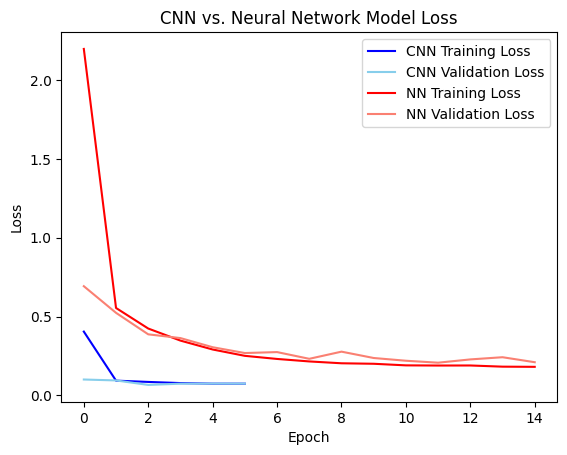

In [ ]:
# Comparison of loss curves
# Plot training and validation loss
plt.plot(history.history['loss'], label='CNN Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='CNN Validation Loss', color='skyblue')
plt.plot(nn_history.history['loss'], label='NN Training Loss', color='red')
plt.plot(nn_history.history['val_loss'], label='NN Validation Loss', color='salmon')
plt.title('CNN vs. Neural Network Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pprint

# Create a DataFrame to store the metrics
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'CNN': [np.average(cnn_precision), np.average(cnn_recall), cnn_f1, cnn_accuracy],
    'NN': [np.average(nn_precision), np.average(nn_recall), nn_f1, nn_accuracy]
}

metrics_df = pd.DataFrame(metrics_data)


# Display the DataFrame
pprint.pprint(metrics_df)

      Metric       CNN        NN
0  Precision  0.978195  0.965583
1     Recall  0.978345  0.965208
2   F1 Score  0.978493  0.965561
3   Accuracy  0.978500  0.965600


In [ ]:
'''
Summary of Comparison:
The CNN model seems to outperform the Neural Network in almost every case.
A simple evaluation of the metrics by class show this.

However, it is interesting to see what tripped each model up.
The Neural Network had more errors in general and they were less concentrated to
specific issues. It had 8 different cases where it mistook one class for another more than 15 times. (Ex: It mistook 4 for 9 36 times)
The CNN had significantly fewer errors and they were also more concentrated: only 2 classes had more than 15 mistakes.
Interestingly, both models had the most mistakes when mistakenly classifying a 4 as a 9.
'''

'\nSummary of Comparison:\nThe CNN model seems to outperform the Neural Network in almost every case.\nA simple evaluation of the metrics by class show this.\n\nHowever, it is interesting to see what tripped each model up. \nThe Neural Network had more errors in general and they were less concentrated to \nspecific issues. It had 8 different cases where it mistook one class for another more than 15 times. (Ex: It mistook 4 for 9 36 times)\nThe CNN had significantly fewer errors and they were also more concentrated: only 2 classes had more than 15 mistakes. \nInterestingly, both models had the most mistakes when mistakenly classifying a 4 as a 9.\n'